In [60]:
from sklearn.linear_model import LinearRegression
import pandas as pd
print("Pandas version", pd.__version__)
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from joblib import dump, load

import wget
# wget.download('https://archive.org/download/ages-and-heights/AgesAndHeights.pkl','AgesAndHeights.pkl')

Pandas version 1.2.3


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fba13761d50>,
      dtype=object)

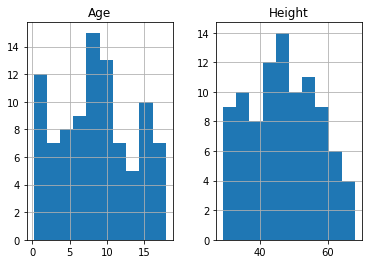

In [34]:
data = pd.read_pickle("AgesAndHeights.pkl")
ages = data['Age']
    
data = data[ages>0]
ages = data['Age']
heights = data['Height']
data.hist()

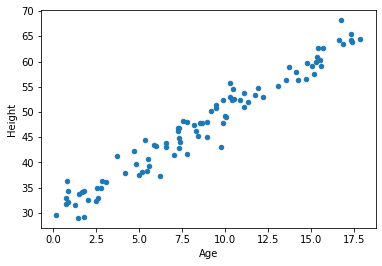

In [6]:
data.plot.scatter(x='Age',y='Height')

In [7]:
fig = px.scatter(x=ages,y=heights, title = "Height vs Age", labels = {"x": "Age(years",
                                                                        "y":"Heights(inches)"} )
fig.show()

In [20]:
ages_np = ages.to_numpy()
heights_np = heights.to_numpy()

ages_np_reshaped = ages_np.reshape(len(ages),1)
print(ages_np_reshaped.shape)

(93, 1)


In [67]:
model = LinearRegression().fit(ages_np_reshaped, heights_np)
model.coef_

x_new = np.arange(18).reshape((18, 1))
preds  = model.predict(x_new)

fig = px.scatter(x=ages, y=heights, title="Height vs Age", labels={'x': 'Age (Years)',
                                                                   'y': 'Height (Inches)'})
fig.add_trace(
    go.Scatter(x=x_new.reshape(x_new.shape[0]), y=preds, mode='lines', name='Model'))
fig.write_image('base.svg', width = 800)
fig.show()

In [30]:
dump(model, 'model.joblib')

['model.joblib']

In [32]:
model_in = load("model.joblib")
model_in.predict(np.array([[1]]))

array([31.96327451])

In [65]:
def floats_string_to_np_arr(floats_str):
    def is_float(s):
        try:
            float(s)
            return True
        except:
            return False
    floats = np.array([float(x) for x in floats_str.split(",") if is_float(x)])
    return floats.reshape(len(floats),1)

floats_string_to_np_arr('1,3,3.2,')

array([[1. ],
       [3. ],
       [3.2]])

In [66]:
def make_picture(train_data_filename, model, new_inp_np_arr, output_file):
    data = pd.read_pickle(train_data_filename)
    ages = data['Age']
    
    data = data[ages>0]
    ages = data['Age']
    heights = data['Height']
    x_new = np.arange(18).reshape((18, 1))
    preds  = model.predict(x_new)

    fig = px.scatter(x=ages, y=heights, title="Height vs Age", labels={'x': 'Age (Years)',
                                                                    'y': 'Height (Inches)'})
    fig.add_trace(
        go.Scatter(x=x_new.reshape(x_new.shape[0]), y=preds, mode='lines', name='Model'))

    new_preds  = model.predict(new_inp_np_arr)
    fig.add_trace(
        go.Scatter(x=new_inp_np_arr.reshape(len(new_inp_np_arr)), y=new_preds, 
                    mode='markers', marker =dict(color='purple',size=10),
                    name='New Outputs'))

    fig.write_image(output_file, width = 800)
    fig.show()


make_picture("AgesAndHeights.pkl",model, floats_string_to_np_arr('1,3,3.2,'), 'x.svg')